# 👋 Task 4: Hand Gesture Recognition using CNNs

This notebook builds a Convolutional Neural Network (CNN) to classify hand gestures from the `leapGestRecog` dataset. The goal is to train a model that can accurately identify 10 different gestures performed by multiple subjects.

The pipeline includes:
1.  **Data Loading and Preprocessing**: Reading and preparing the image data.
2.  **Model Building**: Designing the CNN architecture using TensorFlow and Keras.
3.  **Training**: Training the model on the prepared dataset.
4.  **Evaluation**: Assessing the model's performance and visualizing the results.

### Step 1: Setup - TensorFlow and GPU Check

First, let's ensure TensorFlow is correctly installed and can detect the available GPU for accelerated training.

In [20]:
import tensorflow as tf
# Check the version
print("TensorFlow version:", tf.__version__)

# Check for available GPUs (should list a 'METAL' device)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.16.2
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Step 2: Importing Necessary Libraries

In [21]:
# Import necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

### Step 3: Defining Paths and Parameters

We'll define the core parameters for our project, including the path to the dataset, the target image size for resizing, and the number of classes (gestures).

In [23]:
# --- 1. Define Paths and Parameters ---
# Update this path based on where you have the data (local or Kaggle/Colab)
DATA_DIR = 'DATA/leapGestRecog' # Path to the dataset

IMG_SIZE = (128, 128) # We'll resize all images to 128x128

data = []
labels = []
num_classes = 10 # There are 10 different gestures

print("Loading and preprocessing images...")

Loading and preprocessing images...


### Step 4: Loading and Preprocessing Images

This is a crucial step where we load the image data from the nested directory structure. For each image, we will:
1.  Read it in **grayscale**.
2.  Resize it to a uniform **128x128 pixels**.
3.  Extract the **label** from the gesture folder name (e.g., '01_palm' -> 1).
4.  Append the processed image and its label to our lists.

In [14]:
# --- 2. Load and Preprocess the Images ---
# The data is in subdirectories like '00/01_palm/'

SUBSET_PER_GESTURE = 50 

data = []
labels = []

for subject_folder in sorted(os.listdir(DATA_DIR)):
    subject_path = os.path.join(DATA_DIR, subject_folder)
    if not os.path.isdir(subject_path):
        continue
    
    for gesture_folder in sorted(os.listdir(subject_path)):
        gesture_path = os.path.join(subject_path, gesture_folder)
        if not os.path.isdir(gesture_path):
            continue
            
        # The label is the number at the start of the gesture folder name (e.g., '01' from '01_palm')
        label = int(gesture_folder.split('_')[0])
        
        for filename in sorted(os.listdir(gesture_path)):
            try:
                img_path = os.path.join(gesture_path, filename)
                # Read image in grayscale
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                # Resize the image
                resized_img = cv2.resize(img, IMG_SIZE)
                data.append(resized_img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {filename}: {e}")

print(f"Successfully loaded {len(data)} images.")

Error loading image 01_palm: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading image 02_l: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading image 03_fist: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading image 04_fist_moved: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading image 05_thumb: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv

### Step 5: Preparing Data for the CNN

Now that the images are loaded, we need to prepare them for input into our neural network. This involves:
1.  **Converting to NumPy arrays** and reshaping the image data to include a channel dimension (1 for grayscale).
2.  **Adjusting labels** to be 0-indexed (0-9 instead of 1-10), which is standard for classification tasks.
3.  **Normalizing** the pixel values from the [0, 255] range to [0, 1] to help the model converge faster.
4.  **One-hot encoding** the labels. For example, the label `2` becomes a vector `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]`.
5.  **Splitting** the data into training (80%) and testing (20%) sets.

In [16]:
# --- 3. Final Data Preparation for the CNN ---
# Convert lists to NumPy arrays
X = np.array(data).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1) # Reshape for CNN (1 channel for grayscale)
y = np.array(labels)

# --- FIX STARTS HERE ---

# Add this line to check your labels. It will likely show [1, 2, ..., 10]
print(f"Original unique labels found: {np.unique(y)}")

# If your labels are 1-10, this will shift them to the required 0-9 range.
# If your labels are already 0-10, you should change num_classes to 11 instead.
if np.min(y) > 0:
    print("Adjusting labels to be 0-indexed (subtracting 1).")
    y = y - 1

# --- FIX ENDS HERE ---

# Normalize pixel values to be between 0 and 1
X = X / 255.0

# One-Hot Encode the labels (e.g., label '1' becomes [0, 1, 0, ...])
y_categorical = to_categorical(y, num_classes=num_classes)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData prepared for training:")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Original unique labels found: [ 1  2  3  4  5  6  7  8  9 10]
Adjusting labels to be 0-indexed (subtracting 1).

Data prepared for training:
Training data shape: (16000, 128, 128, 1)
Testing data shape: (4000, 128, 128, 1)


### Step 6: Building the CNN Model

We will build our model using the Keras Sequential API. Our architecture consists of three main parts:

1.  **Convolutional Base**: A stack of `Conv2D` and `MaxPooling2D` layers. The convolutional layers act as feature extractors, learning to identify patterns like edges, textures, and shapes. The max-pooling layers downsample the feature maps, reducing computational complexity and making the learned features more robust.
2.  **Flatten Layer**: This layer unrolls the 2D feature maps into a 1D vector to be fed into the dense layers.
3.  **Dense Classifier Head**:
    * A `Dense` layer acts as the main classifier.
    * A `Dropout` layer is added to prevent overfitting by randomly setting a fraction of input units to 0 during training.
    * The final `Dense` output layer uses a `softmax` activation function to produce a probability distribution over the 10 gesture classes.

In [17]:
print("\nBuilding the CNN model...")

model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
    MaxPooling2D((2, 2)),
    
    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Flatten the output and feed it into Dense layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5), # Dropout to prevent overfitting
    
    # Output Layer
    Dense(num_classes, activation='softmax') # Softmax for multi-class classification
])

# Display the model architecture
model.summary()


Building the CNN model...


/Users/harshmodi/PROGRAMMING/ML/PRODIGY ML INTERNSHIP/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-30 13:43:17.618495: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-09-30 13:43:17.618551: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-09-30 13:43:17.618558: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-09-30 13:43:17.618584: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-30 13:43:17.618602: I tensorflow/core/common_runtime/pluggable_

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,943,370 (49.38 MB)

 Trainable params: 12,943,370 (49.38 MB)

 Non-trainable params: 0 (0.00 B)

### Step 7: Compiling and Training the Model

Before training, we need to **compile** the model, which configures it for training. We specify:
-   **Optimizer**: `'adam'` is an efficient and popular choice.
-   **Loss Function**: `'categorical_crossentropy'` is used for multi-class, one-hot encoded classification problems.
-   **Metrics**: We'll monitor `'accuracy'` during training.

Then, we **train** the model using the `.fit()` method, passing in our training data. We'll also use a portion of the training data as a validation set to monitor performance on unseen data at the end of each epoch.

In [18]:
print("\nCompiling the model...")
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Training the model...")
# Train the model for 10 epochs
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_split=0.1) # Use 10% of training data for validation

print("✅ Model training complete!")


Compiling the model...
Training the model...
Epoch 1/10


2025-09-30 13:43:24.625648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


450/450 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.8661 - loss: 0.9373 - val_accuracy: 0.9937 - val_loss: 0.0970
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.9610 - loss: 5.2445 - val_accuracy: 0.9887 - val_loss: 2.2291
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.9737 - loss: 26.6663 - val_accuracy: 0.9950 - val_loss: 6.4721
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.9826 - loss: 55.0423 - val_accuracy: 0.9969 - val_loss: 13.1529
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9869 - loss: 96.3358 - val_accuracy: 0.9975 - val_loss: 24.3535
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.9897 - loss: 127.4805 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.9876 - loss: 281.9935 - val_accuracy: 0.9987 - val_loss: 50.0365
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.9922 - loss: 250.68

### Step 8: Evaluating Model Performance

After training is complete, we evaluate the model's final performance on the test set, which it has never seen before. We also plot the accuracy and loss curves for both the training and validation sets to visualize how the model learned over time.


Evaluating the model on the test set...
Test Accuracy: 0.9980
Test Loss: 72.5820


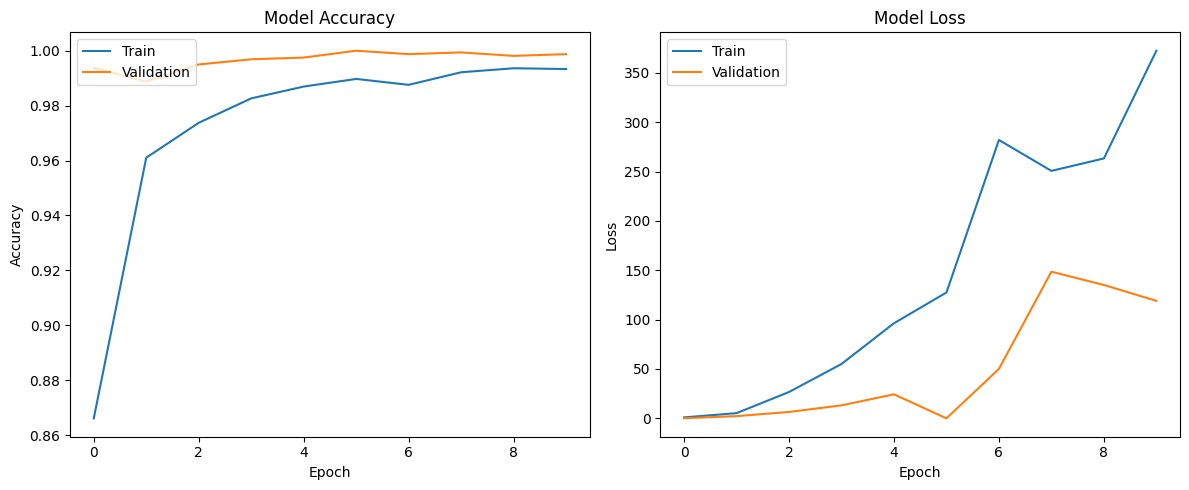

In [19]:
print("\nEvaluating the model on the test set...")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# --- Plot Training History ---
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()